In [1]:
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
import wfdb

In [2]:
def extract_label(header):
    snomed_code_map = {
        '426177001': 'SB',
        '426783006': 'SR',
        '164889003': 'AFIB',
        '427084000': 'ST',
        '164890007': 'AF',
        '427393009': 'SA',
        '426761007': 'SVT',
        '713422000': 'AT',
        '233896004': 'AVNRT',
        '233897008': 'AVRT'
    }
    
    for line in header:
        if line.startswith('#Dx:'):
            codes = line.strip().split(':')[1].strip().split(',')
            for code in codes:
                if code in snomed_code_map:
                    return snomed_code_map[code]
    return "Unknown"

def load_ecg_sample_by_filename(data_dir, file_name):
    file_path = os.path.join(data_dir, file_name)

    print(f"Checking file: {file_path}.mat")  # Add this line for debugging

    if not os.path.exists(file_path + '.mat'):
        raise ValueError(f"No data found for the specified filename: {file_name}")


    # Read ECG signal from the .mat file
    record = wfdb.rdrecord(file_path)
    signal = record.p_signal[:, 0]

    # Read the header file
    header_content = read_header_file(file_path + '.hea')

    # Extract label from the header file
    label = extract_label(header_content)

    return signal, label

data_dir = '/Users/aman/Downloads/ecg/WFDBRecords/01/010/'


In [3]:
def read_header_file(file_path):
    with open(file_path, 'r') as file:
        content = file.readlines()
    return content


In [4]:
import os
import wfdb

def load_ecg_data(data_dir, rhythm_types=None):
    signals = []
    labels = []

    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.mat'):
                file_name = os.path.splitext(file)[0]
                try:
                    signal, label = load_ecg_sample_by_filename(root, file_name)
                    if rhythm_types is None or label in rhythm_types:
                        signals.append(signal)
                        labels.append(label)
                except Exception as e:
                    print(f"Error loading file {file}: {e}")

    return signals, labels

data_dir = '/Users/aman/Downloads/ecg/WFDBRecords/'
rhythm_types = ['SB', 'SR', 'AFIB', 'ST', 'AF', 'SA', 'SVT', 'AT', 'AVNRT', 'AVRT']

signals, labels = load_ecg_data(data_dir, rhythm_types)





Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02973.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02967.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02998.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02999.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02966.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02972.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02958.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02964.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02970.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02971.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02965.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02959.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02961.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/038/JS02

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02778.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02793.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02737.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02723.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02722.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02736.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02720.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02734.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02735.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02721.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02719.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02725.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02731.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/036/JS02

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02151.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02145.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02179.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02178.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02144.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02150.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02183.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02168.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02154.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02140.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02141.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02155.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02169.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/030/JS02

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02920.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02908.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02840.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02854.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02868.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02883.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02897.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02896.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02882.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02869.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02855.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02841.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02909.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/037/JS02

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02327.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02333.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02332.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02326.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02291.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02293.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02324.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02318.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02319.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02325.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02331.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02292.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02296.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/032/JS02

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/035/JS02611.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/035/JS02639.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02595.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02581.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02556.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02542.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02608.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02609.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02543.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02557.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02580.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02594.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02582.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/034/JS02

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02477.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02462.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02476.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02489.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02502.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02506.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02499.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02472.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02466.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02467.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02473.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02498.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02505.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/03/033/JS02

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03262.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03263.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03277.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03288.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03317.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03303.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03315.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03301.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03329.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03275.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03249.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03248.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03260.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/041/JS03

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04016.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04002.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS03989.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04028.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04014.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04000.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04001.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04015.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04029.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04066.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04067.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04073.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04065.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/048/JS04

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03163.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03177.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03215.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03201.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03229.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03228.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03214.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03176.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03162.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03174.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03160.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03148.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03202.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/040/JS03

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03955.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03954.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03940.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03968.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03965.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03971.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03959.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03958.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03970.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03964.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03972.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03967.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03977.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/047/JS03

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03714.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03715.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03701.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03729.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03688.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03717.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03703.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03702.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03716.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03676.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03689.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03699.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03666.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/045/JS03

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03613.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03636.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03622.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03583.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03597.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03568.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03569.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03596.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03582.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03623.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03637.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03609.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03621.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/044/JS03

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/043/JS03485.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/043/JS03526.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/043/JS03532.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/043/JS03533.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/043/JS03527.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/043/JS03453.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/043/JS03484.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/04/043/JS03490.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/324/JS31822.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/324/JS31836.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/324/JS31837.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/324/JS31823.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/324/JS31835.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/324/JS31

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31728.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31729.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31715.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31701.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31717.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31703.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31702.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31716.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31733.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31727.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31726.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31732.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31718.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/323/JS31

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31657.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31643.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31618.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31624.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31630.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31631.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31625.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31619.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31633.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31627.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31626.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31632.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31636.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/322/JS31

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31429.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31428.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31400.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31414.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31402.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31416.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31417.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31403.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31458.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31464.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31470.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31471.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31465.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/320/JS31

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32170.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32164.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32158.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32159.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32165.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32171.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32167.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32173.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32198.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32199.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32172.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32166.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32162.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/327/JS32

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32244.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32250.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32278.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32287.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32293.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32292.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32286.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32279.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32251.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32245.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32253.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32247.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32290.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/328/JS32

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32033.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32037.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32023.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32022.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32036.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32008.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32020.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32034.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32035.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32021.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32009.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32004.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32010.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/326/JS32

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31547.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31553.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31579.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31545.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31551.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31586.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31592.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31593.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31587.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31550.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31544.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31578.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31540.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/32/321/JS31

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34755.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34769.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34782.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34796.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34797.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34783.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34768.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34754.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34740.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34756.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34742.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34795.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34781.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/353/JS34

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34668.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34654.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34640.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34678.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34644.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34650.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34687.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34693.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34692.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34686.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34651.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34645.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34679.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/352/JS34

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34950.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34944.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34945.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34951.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34979.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34986.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34992.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34996.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34982.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34955.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34941.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34969.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34968.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/355/JS34

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34430.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34424.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34418.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34432.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34426.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34427.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34433.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34454.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34440.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34468.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34497.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34483.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34482.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/350/JS34

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35148.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35174.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35160.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35179.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35145.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35151.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35186.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35192.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35193.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35187.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35150.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35144.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35178.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/357/JS35

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34596.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34569.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34541.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34555.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34579.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34551.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34545.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34592.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34586.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34587.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34593.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34544.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34550.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/351/JS34

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35221.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35235.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35209.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35208.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35234.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35220.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35236.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35222.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35223.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35237.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35278.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35250.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35244.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/35/358/JS35

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34048.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34060.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34074.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34075.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34061.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34049.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34006.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34012.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34013.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34007.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34011.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34005.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34039.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/346/JS34

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34224.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34232.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34226.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34227.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34233.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34237.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34223.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34222.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34236.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34208.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34220.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34234.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34235.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/348/JS34

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34329.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34301.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34315.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34314.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34300.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34328.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34316.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34302.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34303.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34317.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34370.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34364.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34358.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/349/JS34

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/340/JS33430.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/340/JS33426.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/340/JS33432.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/340/JS33433.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/340/JS33427.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/347/JS34153.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/347/JS34147.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/347/JS34190.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/347/JS34184.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/347/JS34185.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/347/JS34191.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/347/JS34146.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/347/JS34152.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/347/JS34

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33668.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33650.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33644.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33678.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33693.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33687.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33686.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33692.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33679.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33645.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33651.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33647.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33653.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/342/JS33

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33850.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33878.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33879.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33851.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33845.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33892.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33886.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33890.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33884.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33853.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33847.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33846.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33852.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/344/JS33

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33796.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33782.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33783.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33797.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33740.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33754.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33768.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33742.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33756.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33781.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33795.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33794.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33780.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/34/343/JS33

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33003.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33002.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33016.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33059.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33071.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33065.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33064.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33070.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33058.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33066.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33072.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33099.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33098.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/336/JS33

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32577.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32563.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32588.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32589.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32562.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32576.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32572.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32566.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32599.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32598.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32567.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32573.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32559.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/331/JS32

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/330/JS32498.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/330/JS32467.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/330/JS32473.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33166.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33172.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33199.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33198.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33173.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33167.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33159.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33171.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33165.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33164.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/337/JS33

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33310.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33304.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33305.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33311.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33339.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33315.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33301.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33329.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33328.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33300.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33314.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33302.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33316.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/339/JS33

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32627.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32633.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32616.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32602.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32603.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32617.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32601.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32615.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32629.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32628.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32614.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32600.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32638.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/332/JS32

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32889.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32876.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32862.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32863.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32877.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32888.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32838.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32810.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32804.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32805.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32811.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32839.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32807.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/334/JS32

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32799.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32772.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32766.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32701.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32715.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32729.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32728.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32714.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32700.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32716.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32702.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32703.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32717.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/33/333/JS32

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04569.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04582.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04596.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04580.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04594.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04543.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04557.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04556.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04542.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04595.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04581.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04585.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04591.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/053/JS04

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04438.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04404.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04410.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04411.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04405.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04439.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04489.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04462.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04476.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04477.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04463.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04475.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04461.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/052/JS04

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05174.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05160.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05202.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05216.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05200.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05214.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05228.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05189.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05176.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05162.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05163.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05177.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05188.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/059/JS05

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/050/JS04249.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/050/JS04275.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/050/JS04261.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/050/JS04260.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/050/JS04274.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/050/JS04248.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/057/JS05007.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/057/JS05013.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/057/JS05012.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/057/JS05006.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/057/JS05010.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/057/JS05004.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/057/JS04939.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/057/JS04

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04838.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04817.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04816.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04828.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04829.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04818.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04824.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04830.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04831.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04825.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04819.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04833.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04827.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/056/JS04

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04306.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04312.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04316.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04302.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04303.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04317.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04329.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04301.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04315.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04314.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04300.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/051/JS04328.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/058/JS05038.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/05/058/JS05

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01559.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01566.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01562.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01563.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01561.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01549.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01548.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01560.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01545.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01551.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01550.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01544.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01552.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/024/JS01

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/023/JS01440.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/023/JS01454.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/023/JS01455.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/023/JS01441.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/023/JS01457.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/023/JS01443.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/023/JS01442.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/023/JS01456.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/022/JS01261.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/022/JS01275.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/022/JS01329.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/022/JS01315.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/022/JS01301.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/022/JS01

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01628.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01629.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01615.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01601.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01577.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01588.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01575.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01617.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01603.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01602.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01616.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01574.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01586.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/025/JS01

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/020/JS01132.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/020/JS01091.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/020/JS01085.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01856.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01842.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01843.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01857.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01841.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01855.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01869.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01868.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01854.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01840.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/027/JS01

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02067.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02073.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02072.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02066.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS01989.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS01999.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02076.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02077.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02063.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS01998.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02049.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02075.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02061.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/029/JS02

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01717.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01703.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01677.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01689.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01702.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01716.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01700.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01714.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01728.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01675.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01729.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01715.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01701.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/026/JS01

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01191.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01185.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01218.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01224.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01230.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01226.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01232.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01187.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01179.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01186.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01192.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01233.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01227.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/02/021/JS01

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19701.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19700.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19714.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19728.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19702.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19716.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19717.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19703.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19726.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19732.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19733.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19727.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19731.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/203/JS19

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/202/JS19608.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/202/JS19634.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/202/JS19620.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/202/JS19621.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/202/JS19635.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/202/JS19609.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/205/JS19943.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/205/JS19957.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/205/JS19980.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/205/JS19994.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/205/JS19995.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/205/JS19981.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/205/JS19956.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/205/JS19

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20378.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20393.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20387.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20386.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20392.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20379.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20345.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20351.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20369.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20355.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20341.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20396.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20382.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/209/JS20

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19418.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19419.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19431.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19425.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19409.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19421.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19435.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19434.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19420.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19408.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19436.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19422.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19423.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/200/JS19

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20055.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20041.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20069.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20057.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20043.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20094.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20080.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20081.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20095.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20042.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20056.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20031.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20025.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/206/JS20

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19553.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19552.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19546.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19591.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19585.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19593.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19587.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19550.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19544.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19578.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19579.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19545.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19551.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/20/201/JS19

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17413.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17407.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17448.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17460.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17474.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17475.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17461.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17449.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17488.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17477.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17463.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17462.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17476.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/180/JS17

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18192.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18186.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18148.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18160.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18174.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18175.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18161.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18149.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18188.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18177.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18163.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18162.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18176.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/187/JS18

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/189/JS18312.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/189/JS18304.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/189/JS18310.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/189/JS18338.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/189/JS18339.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/189/JS18311.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/189/JS18305.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/188/JS18297.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/188/JS18283.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/188/JS18268.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/188/JS18254.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/188/JS18240.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/188/JS18241.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/188/JS18

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18044.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18050.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18078.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18079.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18051.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18045.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18092.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18086.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18090.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18084.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18053.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18047.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18046.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/186/JS18

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17580.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17594.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17582.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17596.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17569.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17541.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17555.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17554.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17540.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17568.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17597.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17583.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17587.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/181/JS17

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/184/JS17800.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/184/JS17814.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/184/JS17828.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/184/JS17802.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/184/JS17816.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/184/JS17817.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/184/JS17803.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/183/JS17749.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/183/JS17775.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/183/JS17761.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/183/JS17760.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/183/JS17774.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/183/JS17748.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/183/JS17

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17610.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17638.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17639.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17611.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17605.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17689.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17662.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17676.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17677.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17663.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17688.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17649.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17675.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/182/JS17

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17908.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17934.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17920.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17921.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17935.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17909.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17910.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17904.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17938.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17939.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17905.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17911.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17907.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/18/185/JS17

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26830.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26824.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26825.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26831.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26819.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26835.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26821.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26809.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26808.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26820.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26834.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26822.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26836.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/274/JS26

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26640.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26654.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26678.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26650.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26644.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26693.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26687.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26686.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26692.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26645.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26651.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26679.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26647.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/272/JS26

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26982.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26996.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26941.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26955.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26969.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26968.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26954.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26940.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26997.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26983.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26995.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26981.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26956.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/275/JS26

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27151.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27145.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27192.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27186.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27187.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27193.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27144.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27150.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27178.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27146.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27152.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27185.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27191.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/277/JS27

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27379.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27341.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27355.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27369.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27382.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27396.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27397.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27383.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27368.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27354.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27340.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27356.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27342.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/279/JS27

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/278/JS27296.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/278/JS27297.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/278/JS27283.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/278/JS27268.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/278/JS27254.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/278/JS27240.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/276/JS27067.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/276/JS27073.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/276/JS27098.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/276/JS27099.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/276/JS27072.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/276/JS27066.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/276/JS27058.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/276/JS27

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26513.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26512.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26506.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26538.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26510.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26504.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26505.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26511.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26539.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26576.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26562.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26589.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26588.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/27/271/JS26

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10557.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10543.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10594.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10580.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10596.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10582.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10555.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10541.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10569.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10568.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10540.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10554.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10583.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/111/JS10

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11234.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11208.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11209.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11235.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11221.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11237.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11223.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11222.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11236.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11292.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11286.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11279.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11251.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/118/JS11

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11395.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11381.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11319.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11325.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11331.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11330.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11324.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11318.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11332.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11326.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11327.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11333.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11337.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/119/JS11

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11192.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11186.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11190.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11184.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11153.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11147.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11146.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11152.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11185.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11191.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11195.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11181.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11156.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/117/JS11

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10617.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10603.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10607.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10613.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10612.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10606.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10638.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10610.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10604.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10605.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10611.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/112/JS10639.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/115/JS10967.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/115/JS10

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10817.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10858.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10870.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10864.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10865.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10871.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10859.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10867.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10873.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10898.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10899.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10872.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10866.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/114/JS10

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10714.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10738.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10710.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10704.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10705.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10711.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10739.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10707.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10713.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10712.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10706.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10761.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10775.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/11/113/JS10

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28903.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28902.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28916.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28912.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28906.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28907.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28913.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28939.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28905.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28911.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28910.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28904.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28938.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/295/JS28

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/294/JS28826.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/294/JS28832.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28778.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28744.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28750.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28787.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28793.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28792.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28786.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28751.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28745.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28779.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28753.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/293/JS28

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29282.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29283.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29297.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29268.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29240.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29254.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29242.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29256.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29281.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29295.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29294.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29280.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29257.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/298/JS29

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28597.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28583.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28582.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28596.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28569.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28541.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28555.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28543.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28557.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28580.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28594.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28595.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28581.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/291/JS28

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/290/JS28415.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/290/JS28429.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/290/JS28428.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/290/JS28414.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/290/JS28400.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/290/JS28416.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/290/JS28402.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/290/JS28403.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/290/JS28417.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/297/JS29102.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/297/JS29116.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/297/JS29117.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/297/JS29103.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/297/JS29

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29313.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29339.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29305.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29311.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29310.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29304.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29338.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29363.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29377.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29388.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29389.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29376.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29362.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/29/299/JS29

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16203.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16264.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16270.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16258.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16259.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16271.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16265.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16298.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16273.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16267.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16266.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16272.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16299.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/168/JS16

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15548.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15549.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15575.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15561.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15588.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15577.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15563.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15562.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15576.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15589.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15539.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15511.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15505.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/161/JS15

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15442.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15443.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15457.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15480.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15494.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15482.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15496.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15441.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15455.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15469.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15468.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15454.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15440.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/160/JS15

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16323.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16337.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16336.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16322.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16308.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16334.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16320.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16321.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16335.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16309.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16391.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16385.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16352.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/169/JS16

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15685.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15691.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15646.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15652.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15653.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15647.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15690.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15684.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15692.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15686.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15679.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15651.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15645.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/162/JS15

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15949.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15948.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15974.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15960.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15958.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15964.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15970.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15971.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15965.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15959.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15973.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15967.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15998.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/165/JS15

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15707.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15706.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15712.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15738.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15704.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15710.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15711.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15705.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15739.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15701.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15715.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15729.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15728.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/16/163/JS15

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41600.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41614.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41602.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41616.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41617.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41603.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41658.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41664.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41670.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41671.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41665.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41659.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41698.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/422/JS41

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41866.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41801.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41815.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41829.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41828.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41814.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41800.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41816.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41802.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41803.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41817.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41813.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41807.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/424/JS41

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41705.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41711.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41739.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41707.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41713.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41712.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41706.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41702.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41716.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41717.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41703.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41715.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41701.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/423/JS41

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41550.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41544.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41545.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41551.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41579.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41586.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41592.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41584.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41590.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41547.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41553.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41552.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41546.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/421/JS41

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42262.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42276.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42277.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42263.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42288.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42285.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42291.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42246.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42252.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42253.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42247.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42290.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42284.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/428/JS42

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42322.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42336.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42392.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42386.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42351.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42345.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42379.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42378.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42344.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42350.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42387.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42393.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42385.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/429/JS42

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/420/JS41448.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/420/JS41449.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/420/JS41461.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/420/JS41475.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/420/JS41488.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/420/JS41463.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/420/JS41477.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/420/JS41476.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/420/JS41462.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/420/JS41489.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/427/JS42199.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/427/JS42172.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/427/JS42166.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/42/427/JS42

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44604.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44610.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44611.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44605.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44639.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44613.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44607.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44606.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44612.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44637.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44623.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44622.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44636.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/452/JS44

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44939.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44915.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44901.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44929.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44928.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44900.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44914.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44902.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44916.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44917.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/455/JS44903.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/454/JS44852.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/454/JS44846.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/454/JS44

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44799.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44780.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44794.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44743.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44757.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44756.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44742.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44795.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44781.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44797.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44783.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44754.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44740.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/453/JS44

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45213.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45212.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45206.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45202.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45216.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45217.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45203.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45215.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45201.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45229.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45228.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45200.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/458/JS45214.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/456/JS45

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44583.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44595.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44581.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44556.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44542.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44543.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44557.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44580.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44594.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44590.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44584.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44553.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44547.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/451/JS44

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45191.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45185.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45193.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45187.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45178.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45150.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45144.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45145.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45151.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45179.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45186.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45192.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45196.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/457/JS45

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45371.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45365.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45359.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45398.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45373.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45367.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45366.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45372.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45399.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45389.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45376.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45362.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45363.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/45/459/JS45

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28134.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28108.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28122.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28136.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28137.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28123.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28127.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28133.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28132.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28126.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28130.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28124.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28118.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/287/JS28

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/289/JS28364.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/289/JS28358.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/289/JS28359.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/289/JS28365.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/289/JS28371.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/288/JS28208.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/288/JS28220.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/288/JS28234.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/288/JS28235.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/288/JS28221.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/288/JS28209.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/288/JS28237.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/288/JS28223.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/288/JS28

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28069.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28041.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28055.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28082.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28096.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28097.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28083.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28054.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28040.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28068.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28056.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28042.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28095.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/286/JS28

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27545.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27522.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27536.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27537.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27523.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27509.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27535.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27521.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27520.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27534.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27508.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27530.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27524.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/281/JS27

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27758.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27759.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27765.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27771.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27767.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27773.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27798.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27799.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27772.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27766.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27743.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27757.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27780.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/283/JS27

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27656.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27642.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27646.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27652.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27685.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27691.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27690.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27684.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27653.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27647.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27651.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27645.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27679.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/28/282/JS27

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16862.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16876.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16839.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16811.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16805.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16804.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16810.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16838.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16806.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16812.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16813.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16807.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16803.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/174/JS16

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16798.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16700.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16714.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16728.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16729.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16715.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16701.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16717.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16703.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16702.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16716.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16712.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16706.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/173/JS16

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16950.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16987.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16993.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16992.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16986.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16951.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16945.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16979.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16953.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16947.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16990.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16984.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16985.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/175/JS16

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17159.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17175.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17161.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17149.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17148.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17160.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17174.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17189.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17162.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17176.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17177.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17163.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17188.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/177/JS17

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17346.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17352.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17385.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17391.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17395.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17381.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17356.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17342.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17343.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17357.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17380.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17394.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17382.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/179/JS17

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17065.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17071.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17059.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17098.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17067.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17073.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17072.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17066.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17099.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17089.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17062.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17076.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17077.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/176/JS17

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16574.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16560.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16589.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16576.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16562.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16563.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16577.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16588.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16598.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16573.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16567.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16566.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16572.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/17/171/JS16

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09749.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09748.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09760.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09774.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09789.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09762.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09776.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09777.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09763.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09788.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09767.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09773.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09772.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/103/JS09

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09673.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09672.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09666.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09680.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09643.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09657.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09656.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09642.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09681.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09683.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09654.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09640.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09668.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/102/JS09

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09901.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09929.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09928.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09900.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09914.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09973.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09967.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09998.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09999.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09966.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09972.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09958.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09964.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/105/JS09

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09388.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09439.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09411.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09405.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09404.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09376.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09410.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09438.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09389.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09406.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09412.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09374.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09413.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/100/JS09

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10120.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10121.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10135.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10109.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10110.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10104.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10138.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10139.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10105.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10111.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10107.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10113.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10112.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/107/JS10

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/106/JS10029.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/106/JS10015.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/106/JS10001.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/106/JS10000.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/106/JS10014.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/106/JS10028.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/106/JS10002.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/106/JS10016.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/106/JS10017.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/106/JS10003.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/101/JS09577.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/101/JS09563.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/101/JS09562.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/101/JS09

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10296.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10282.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10269.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10255.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10241.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10240.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10254.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10268.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10283.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10297.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10281.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10295.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10242.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/10/108/JS10

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18903.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18902.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18916.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18900.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18914.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18928.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18929.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18915.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18901.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18939.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18905.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18911.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18910.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/195/JS18

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18825.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18819.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18842.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18856.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18881.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18895.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18894.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18880.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18857.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18843.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18855.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18841.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18869.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/194/JS18

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19261.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19275.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19259.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19271.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19265.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19264.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19270.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19258.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19299.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19266.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19272.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19273.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19267.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/198/JS19

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19080.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19057.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19043.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19042.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19056.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19081.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19095.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19091.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19085.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19052.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19046.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19047.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19053.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/196/JS19

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/191/JS18502.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/191/JS18503.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/191/JS18517.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18485.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18491.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18446.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18452.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18453.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18447.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18490.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18484.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18492.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18486.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/190/JS18

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19119.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19131.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19125.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19124.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19130.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19118.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19194.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19180.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19157.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19143.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19142.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19156.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19181.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/19/197/JS19

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26209.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26252.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26246.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26291.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26285.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26284.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26290.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26247.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26253.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26245.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26251.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26279.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26286.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/268/JS26

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26062.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26048.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26074.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26060.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26061.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26075.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26049.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26012.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26006.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26007.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26013.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26005.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26011.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/266/JS26

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25411.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25405.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25404.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25410.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25438.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25406.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25412.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25413.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25407.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25403.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25417.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25416.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25402.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/260/JS25

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26174.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26160.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26161.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26175.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26149.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26163.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26177.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26188.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26189.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26176.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/267/JS26162.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/269/JS26345.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/269/JS26351.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/269/JS26

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25635.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25621.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25637.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25623.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25622.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25636.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25679.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25651.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25645.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25692.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25686.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25687.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25693.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/262/JS25

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25887.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25891.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25885.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25852.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25846.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25847.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25853.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25884.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25890.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25834.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25820.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25808.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25809.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/264/JS25

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/263/JS25708.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/263/JS25709.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/263/JS25735.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/26/263/JS25721.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/216/JS21006.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/216/JS21012.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/216/JS21013.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/216/JS21007.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/216/JS21039.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/216/JS21011.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/216/JS21005.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/216/JS21004.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/216/JS21010.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/216/JS21

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20589.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20576.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20562.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20566.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20572.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20599.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20598.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20573.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20567.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20559.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20571.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20565.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20564.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/211/JS20

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21338.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21304.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21310.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21311.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21305.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21339.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21301.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21315.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21329.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21328.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21314.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21300.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21316.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/219/JS21

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/210/JS20470.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/210/JS20458.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/210/JS20466.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/210/JS20472.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/210/JS20499.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/210/JS20498.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/210/JS20473.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/210/JS20467.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/217/JS21172.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/217/JS21166.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/217/JS21199.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/217/JS21198.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/217/JS21167.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/217/JS21

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20630.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20618.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20626.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20632.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20633.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20627.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20602.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20616.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20617.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20603.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20615.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20601.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20629.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/212/JS20

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20838.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20804.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20810.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20811.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20805.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20839.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20813.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20807.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20806.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20812.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20816.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20802.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20803.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/214/JS20

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20714.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20702.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20716.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20717.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20703.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20707.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20713.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20712.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20706.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20738.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20710.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20704.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20705.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/21/213/JS20

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44151.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44145.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44179.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44178.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44144.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44150.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44187.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44193.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44185.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44191.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44146.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44152.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44153.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/447/JS44

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44271.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44259.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44258.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44270.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44264.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44299.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44272.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44266.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44267.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44273.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44298.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44288.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44277.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/448/JS44

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44020.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44034.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44035.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44021.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44009.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44085.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44091.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44046.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44052.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44053.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44047.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44090.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44084.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/446/JS44

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43889.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43888.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43877.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43863.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43804.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43810.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43838.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43839.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43811.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43805.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43813.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43807.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43806.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/444/JS43

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43714.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43728.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43702.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43716.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43717.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43703.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43707.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43713.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43712.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43706.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43710.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43704.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43738.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/443/JS43

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43948.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43951.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43945.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43979.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43992.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43986.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43987.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43993.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43978.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43944.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43950.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43946.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43952.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/44/445/JS43

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43339.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43305.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43311.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43310.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43304.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43338.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43312.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43306.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43307.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43313.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43317.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43303.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43302.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/439/JS43

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43136.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43122.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43186.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43192.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43179.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43145.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43151.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43150.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43144.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43178.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43193.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43187.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43191.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/437/JS43

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43015.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43001.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43029.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43028.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43000.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43014.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43098.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43073.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43067.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43066.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43072.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43099.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43058.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/436/JS43

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43287.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43278.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43250.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43244.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43245.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43251.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43279.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43286.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43292.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43284.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43290.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43247.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43253.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/438/JS43

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42853.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42884.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42890.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42891.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42885.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42852.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42846.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42842.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42856.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42881.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42895.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42894.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42880.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/434/JS42

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42719.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42727.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42733.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42732.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42726.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42782.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42796.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42741.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42755.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42769.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42768.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42754.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42740.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/433/JS42

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42947.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42953.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42984.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42990.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42991.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42985.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42952.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42946.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42978.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42950.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42944.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42993.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42987.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/43/435/JS42

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07273.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07267.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07298.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07307.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07281.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07295.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07242.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07256.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07257.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07243.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07294.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07280.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07296.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/079/JS07

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06320.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06334.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06308.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06309.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06335.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06321.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06269.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06282.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06296.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06280.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06294.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06337.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06323.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/070/JS06

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06413.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06375.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06407.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06406.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06412.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06374.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06416.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06402.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06403.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06371.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06417.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06398.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06429.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/071/JS06

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07204.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07166.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07172.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07199.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07129.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07115.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07101.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07100.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07114.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07128.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07102.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07116.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07117.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/078/JS07

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06672.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06666.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06667.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06673.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06677.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06663.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06662.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06676.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06648.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06660.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06675.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06661.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/073/JS06649.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/074/JS06

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06835.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06834.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06820.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06808.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06798.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06836.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06822.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06823.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06837.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06833.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06827.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06826.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06832.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/07/075/JS06

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37728.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37700.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37714.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37773.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37767.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37798.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37799.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37766.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37772.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37758.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37764.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37770.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37771.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/383/JS37

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37870.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37864.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37865.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37871.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37859.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37898.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37867.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37873.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37872.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37866.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/384/JS37899.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/385/JS37937.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/385/JS37923.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/385/JS37

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37608.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37609.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37621.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37635.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37623.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37637.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37636.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37622.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37679.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37645.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37651.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37686.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37692.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/382/JS37

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38182.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38183.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38197.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38168.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38140.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38154.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38142.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38156.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38181.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38195.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38194.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38180.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38157.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/387/JS38

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37496.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37482.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37483.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37497.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37468.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37440.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37454.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37442.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37456.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37481.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37495.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37494.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37480.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/380/JS37

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38096.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38082.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38083.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38097.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38068.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38040.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38054.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38059.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38071.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38065.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38064.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38070.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38058.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/38/386/JS38

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35908.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35920.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35934.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35935.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35921.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35909.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35937.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35923.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35922.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35936.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35992.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35986.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35951.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/365/JS35

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35657.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35643.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35694.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35680.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35681.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35695.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35642.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35656.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35652.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35646.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35691.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35685.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35684.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/362/JS35

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35880.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35894.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35843.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35857.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35856.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35842.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35895.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35881.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35825.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35831.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35819.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35818.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35830.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/364/JS35

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35508.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35524.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35530.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35518.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35519.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35531.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35525.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35533.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35527.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35526.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/361/JS35532.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/366/JS36022.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/366/JS36036.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/366/JS36

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36256.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36242.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36254.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36240.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36268.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36297.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36283.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36282.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36296.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36269.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36241.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36255.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36279.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/368/JS36

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36326.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36327.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36333.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36316.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36302.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36303.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36317.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36301.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36315.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36329.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36328.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36314.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36300.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/369/JS36

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35499.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35498.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35473.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35467.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35428.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35400.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35414.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35415.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35401.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35429.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35417.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35403.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35402.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/36/360/JS35

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08529.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08515.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08501.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08449.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08461.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08475.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08474.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08460.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08448.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08500.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08514.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08510.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08504.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/091/JS08

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09229.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09177.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09188.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09266.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09267.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09265.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09259.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09258.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09264.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09248.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09260.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09261.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09249.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/098/JS09

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/099/JS09342.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/099/JS09343.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/099/JS09357.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/099/JS09369.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/099/JS09341.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/099/JS09355.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/099/JS09354.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/099/JS09340.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/097/JS09166.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/097/JS09164.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/097/JS09158.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/097/JS09165.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/097/JS09149.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/097/JS09

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08431.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08425.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08419.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08418.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08424.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08356.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08430.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08381.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08398.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08373.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08367.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08401.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08366.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/090/JS08

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/095/JS08895.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/095/JS08881.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/095/JS08880.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/095/JS08894.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/095/JS08937.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/095/JS08923.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/092/JS08655.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/092/JS08641.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/092/JS08640.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/092/JS08654.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/092/JS08642.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/092/JS08643.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/092/JS08647.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/092/JS08

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08727.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08684.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08690.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08691.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08685.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08726.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08732.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08724.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08730.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08718.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08693.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08687.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08678.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/093/JS08

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08832.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08826.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08761.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08775.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08771.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08759.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08822.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08836.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08837.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08823.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08758.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08764.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08770.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/09/094/JS08

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30652.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30685.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30691.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30690.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30684.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30653.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30647.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30643.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30657.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30680.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30694.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30695.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30681.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/312/JS30

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30789.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30788.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30777.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30763.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30704.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30710.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30738.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30739.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30711.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30705.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30713.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30707.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30706.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/313/JS30

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31200.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31214.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31228.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31202.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31216.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31217.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31203.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31207.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31213.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31212.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31206.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31210.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31204.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/318/JS31

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30570.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30564.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30572.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30566.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30599.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30598.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30567.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30573.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30577.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30563.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30588.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30589.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30562.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/311/JS30

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31173.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31167.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31128.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31100.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31114.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31115.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31101.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31129.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31117.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31103.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31102.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31116.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31112.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/317/JS31

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30472.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30466.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30499.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30498.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30467.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30473.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30465.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30471.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30459.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30458.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30470.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30464.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30448.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/31/310/JS30

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30195.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30181.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30156.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30142.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30146.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30152.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30185.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30191.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30190.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30184.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30153.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30147.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30179.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/307/JS30

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30309.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30308.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30320.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30334.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30322.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30336.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30337.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30323.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30327.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30333.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30332.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30326.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30318.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/309/JS30

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30215.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30239.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30211.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30205.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30204.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30210.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30238.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30206.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30212.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30213.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30207.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30260.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30274.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/308/JS30

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30052.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30085.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30091.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30090.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30084.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30053.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30047.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30020.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30034.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30008.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30009.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30035.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30021.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/306/JS30

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29733.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29727.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29723.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29737.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29736.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29722.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29708.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29734.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29720.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29721.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29735.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/303/JS29709.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/304/JS29880.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/304/JS29

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29951.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29945.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29979.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29978.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29944.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29950.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29987.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29993.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29949.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29975.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29961.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29960.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29974.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/30/305/JS29

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37339.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37338.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37310.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37304.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37363.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37377.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37388.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37389.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37376.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37362.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37348.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37374.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37360.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/379/JS37

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37137.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37136.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37122.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37108.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37134.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37120.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37121.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37135.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37109.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37131.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37125.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37119.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37118.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/377/JS37

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36523.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36522.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36536.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36508.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36520.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36534.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36535.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36521.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36509.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36504.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36510.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36538.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36539.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/371/JS36

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37266.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37272.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37299.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37298.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37273.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37267.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37271.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37265.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37259.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37258.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37264.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37270.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37217.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/378/JS37

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36729.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36703.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36717.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36716.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36702.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36765.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36771.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36759.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36758.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36770.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36764.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36772.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36766.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/373/JS36

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36972.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36973.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36967.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36998.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36928.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36900.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36914.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36915.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36901.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36929.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36917.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36903.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36902.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/375/JS36

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36613.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36607.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36603.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36617.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36616.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36602.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36628.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36614.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36600.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36601.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36615.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/37/372/JS36629.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/083/JS07638.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/083/JS07

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07802.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07786.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07779.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07745.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07751.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07750.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07744.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07778.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07793.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07787.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07803.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07817.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07801.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/084/JS07

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07607.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07613.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07559.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07571.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07565.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07564.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07570.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07558.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07612.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07606.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07602.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07574.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07560.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/082/JS07

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08307.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08313.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08312.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08306.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08266.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08272.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08299.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08289.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08276.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08262.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08302.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08316.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08317.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/089/JS08

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07365.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07359.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07358.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07402.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07364.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07370.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07317.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07316.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07328.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07314.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07315.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07329.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07311.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/080/JS07

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07430.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07431.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07425.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07419.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07421.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07435.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07409.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07434.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07420.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07436.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07422.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07423.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/081/JS07437.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/086/JS07

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08208.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08195.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08142.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08156.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08157.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08143.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08194.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08180.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08209.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08221.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08235.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08223.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08237.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/08/088/JS08

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/015/JS00600.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00235.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00221.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00209.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00208.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00220.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00234.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00222.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00236.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00237.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00223.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00227.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00233.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/012/JS00

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00313.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00360.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00406.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00374.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00348.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00349.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00375.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00361.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00407.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00388.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00377.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00405.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00363.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/013/JS00

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00859.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00871.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00865.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00868.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00840.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00854.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00883.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00897.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00934.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00921.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00935.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00909.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00896.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/018/JS00

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00691.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00646.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00652.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00732.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00726.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00727.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00653.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00647.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00690.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00684.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00692.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00686.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00651.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/016/JS00

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00772.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00766.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00799.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00821.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00835.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00809.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00831.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00825.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00819.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00762.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00776.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00777.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00763.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/017/JS00

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01011.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01039.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01038.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01010.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01004.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01009.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01021.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01035.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01034.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01020.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01008.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01036.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01022.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/01/019/JS01

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/065/JS05816.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/065/JS05802.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/065/JS05803.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/065/JS05817.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/065/JS05778.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/065/JS05750.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/065/JS05793.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/065/JS05787.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/062/JS05439.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/062/JS05438.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/062/JS05528.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/062/JS05500.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/062/JS05514.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/062/JS05

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05609.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05557.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05543.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05594.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05580.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05596.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05582.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05569.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05555.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05541.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05623.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05637.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05636.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/063/JS05

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05363.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05377.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05411.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05376.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05410.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05404.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05362.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05389.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05412.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05374.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05360.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05406.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05348.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/061/JS05

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05917.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05929.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05901.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05915.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05849.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05875.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05861.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05860.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05874.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05848.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05900.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05928.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05949.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/066/JS05

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06191.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06230.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06224.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06218.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06232.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06226.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06187.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06193.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06178.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06179.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06192.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06186.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06227.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/069/JS06

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05229.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05299.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05266.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05272.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05312.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05306.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05307.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05313.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05273.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05267.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05298.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05259.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05271.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/06/060/JS05

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38517.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38503.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38507.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38513.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38512.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38506.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38510.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38504.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38538.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38539.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38505.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38511.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38576.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/391/JS38

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39213.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39207.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39211.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39205.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39239.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39238.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39204.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39210.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39228.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39214.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39200.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39201.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39215.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/398/JS39

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39327.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39333.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39332.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39326.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39322.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39336.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39337.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39323.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39309.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39335.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39321.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39320.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39334.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/399/JS39

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38453.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38445.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38451.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38479.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38486.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38492.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38493.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38487.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38478.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38450.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38444.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38449.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38461.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/390/JS38

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38634.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38620.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38608.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38636.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38622.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38623.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38637.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38633.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38627.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38626.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38632.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38624.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38630.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/392/JS38

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38739.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38738.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38710.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38704.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38712.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38706.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38707.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38713.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38748.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38774.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38760.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38761.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38775.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/39/393/JS38

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45494.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45480.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45457.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45443.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45442.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45456.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45481.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45495.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45491.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45485.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45452.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45446.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45447.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/46/460/JS45

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40731.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40709.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40735.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40721.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40720.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40734.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40708.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40722.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40736.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40737.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40723.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40787.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40793.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/413/JS40

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40954.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40968.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40950.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40944.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40978.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40993.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40987.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40986.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40992.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40979.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40945.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40951.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40947.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/415/JS40

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40624.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40618.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40619.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40625.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40631.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40627.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40633.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40632.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40626.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40622.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40636.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40637.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40623.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/412/JS40

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41147.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41153.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41184.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41190.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41186.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41192.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41145.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41151.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41179.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41178.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41150.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41144.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41193.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/417/JS41

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40566.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40599.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40570.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40564.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40558.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40559.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40565.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40571.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40549.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40575.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40561.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40560.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40574.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/411/JS40

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41000.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41014.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41028.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41002.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41016.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41017.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41003.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41007.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41013.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41012.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41006.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41010.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41004.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/41/416/JS41

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23945.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23951.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23979.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23986.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23992.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23984.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23990.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23947.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23953.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23952.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23946.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23991.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23985.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/245/JS23

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23631.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23619.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23627.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23633.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23632.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23626.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23622.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23636.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23637.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23623.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23635.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23621.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23609.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/242/JS23

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23893.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23887.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23878.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23850.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23844.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23845.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23851.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23879.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23886.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23892.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23874.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23860.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23848.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/244/JS23

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23558.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23570.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23564.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23565.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23571.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23559.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23575.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23561.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23549.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23548.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23560.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23574.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23562.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/241/JS23

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24099.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24098.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24073.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24067.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24059.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24071.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24065.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24064.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24070.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24058.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24017.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24003.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24002.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/246/JS24

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23462.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23476.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23489.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23488.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23477.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23463.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23475.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23461.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23449.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23448.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23460.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23474.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23479.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/24/240/JS23

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22916.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22902.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22903.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22917.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22929.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22901.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22915.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22914.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22900.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22928.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22904.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22910.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22938.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/235/JS22

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22605.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22611.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22629.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22615.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22601.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22600.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22614.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22628.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22602.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22616.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22617.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22603.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22664.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/232/JS22

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22815.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22814.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22800.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22828.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22816.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22802.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22803.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22817.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22813.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22807.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22806.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22812.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22804.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/234/JS22

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22513.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22505.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22511.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22539.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22538.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22510.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22504.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22528.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22500.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22514.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22515.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22501.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22529.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/231/JS22

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23240.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23297.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23283.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23282.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23296.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23241.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23255.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23269.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23251.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23245.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23279.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23292.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23286.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/238/JS23

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23117.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23116.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23102.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23106.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23112.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23113.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23107.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23111.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23105.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23139.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23138.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23104.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23110.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/23/237/JS23

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15177.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15163.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15188.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15149.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15175.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15161.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15160.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15174.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15148.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15170.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15164.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15158.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15159.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/157/JS15

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14402.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14416.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14417.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14403.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14429.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14415.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14401.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14400.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14414.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14428.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14498.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14473.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14467.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/150/JS14

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15260.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15274.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15275.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15261.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15249.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15265.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15271.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15259.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15258.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15270.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15264.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15299.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15272.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/158/JS15

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14560.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14548.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14507.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14513.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14512.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14506.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14510.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14504.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14538.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14539.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14505.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14511.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14529.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/151/JS14

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14782.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14769.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14755.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14741.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14740.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14754.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14768.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14783.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14797.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14781.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14795.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14742.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14756.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/153/JS14

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14902.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14928.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14914.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14900.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14901.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14915.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14929.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14911.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14905.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14939.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14938.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14904.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14910.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/155/JS14

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14638.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14610.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14604.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14628.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14600.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14614.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14615.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14601.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14629.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14617.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14603.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14602.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14616.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/15/152/JS14

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12191.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12185.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12152.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12146.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12147.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12153.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12184.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12190.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12134.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12120.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12108.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12109.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12121.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/127/JS12

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/120/JS11453.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/120/JS11447.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/120/JS11490.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/120/JS11484.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/121/JS11516.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/121/JS11502.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/121/JS11503.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/121/JS11517.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/121/JS11529.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/121/JS11501.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/121/JS11515.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/121/JS11514.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/121/JS11500.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/121/JS11

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12044.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12078.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12093.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12087.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12061.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12075.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12049.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12048.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12074.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12060.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12089.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12076.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12062.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/126/JS12

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11777.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11763.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11762.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11776.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11789.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11748.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11760.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11774.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11775.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11761.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11749.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11765.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11771.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/123/JS11

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11858.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11864.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11870.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11848.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11874.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11860.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11861.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11875.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11849.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11863.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11877.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11888.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11889.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/124/JS11

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11635.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11621.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11620.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11634.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11608.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11630.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11624.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11618.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11619.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11625.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11631.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11627.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11633.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/12/122/JS11

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40029.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40001.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40015.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40039.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40011.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40005.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40004.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40010.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40038.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40006.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40012.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40013.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40007.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/406/JS40

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40293.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40285.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40291.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40246.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40252.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40253.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40247.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40290.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40284.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40220.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40234.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40208.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40209.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/408/JS40

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40167.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40173.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40198.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40114.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40100.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40128.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40129.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40101.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40115.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40103.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40117.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40116.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40102.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/407/JS40

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39487.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39493.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39492.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39486.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39451.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39445.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39479.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39453.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39447.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39490.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39484.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39485.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39491.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/400/JS39

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39663.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39667.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39673.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39698.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39699.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39672.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39666.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39658.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39670.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39664.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39665.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39671.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39659.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/402/JS39

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39780.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39794.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39795.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39781.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39756.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39742.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39754.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39740.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39768.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39797.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39783.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39782.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39796.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/40/403/JS39

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12961.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12960.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12974.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12948.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12970.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12964.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12958.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12959.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12965.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12971.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12967.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12973.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12998.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/135/JS12

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12659.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12671.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12665.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12649.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12661.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12675.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12674.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12660.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12648.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12689.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12676.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12662.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12663.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/132/JS12

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12875.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12861.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12860.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12874.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12848.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12862.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12876.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12889.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12888.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12877.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12863.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12867.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12873.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/134/JS12

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12516.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12528.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12500.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12514.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12515.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12501.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12529.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12599.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12566.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12572.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12573.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12567.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12598.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/131/JS12

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13229.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13201.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13215.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13214.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13200.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13228.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13204.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13210.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13238.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13239.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13211.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13205.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13213.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/138/JS13

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13321.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13309.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13337.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13323.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13322.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13336.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13332.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13326.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13327.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13333.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13325.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13331.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13319.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/139/JS13

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12495.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12442.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12456.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12457.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12443.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12494.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12480.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12496.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12482.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12469.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12455.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12441.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12440.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/13/130/JS12

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/145/JS13910.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/145/JS13904.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/145/JS13938.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/145/JS13912.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/145/JS13906.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/145/JS13907.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/145/JS13913.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/142/JS13659.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/142/JS13665.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/142/JS13671.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/142/JS13670.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/142/JS13664.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/142/JS13658.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/142/JS13

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13778.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13744.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13750.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13751.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13745.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13779.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13792.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13786.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13782.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13796.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13741.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13755.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13769.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/143/JS13

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14280.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14257.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14243.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14242.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14256.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14281.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14295.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14291.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14285.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14252.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14246.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14247.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14253.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/148/JS14

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13540.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13568.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13569.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13541.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13555.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13582.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13596.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13532.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13526.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13527.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13533.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13519.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13525.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/141/JS13

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14183.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14197.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14181.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14195.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14142.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14156.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14157.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14143.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14194.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14180.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14184.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14190.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14147.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/147/JS14

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13483.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13454.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13440.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13468.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13469.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13441.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13455.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13482.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13496.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13480.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13494.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13443.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13457.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/14/140/JS13

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22378.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22350.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22344.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22393.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22387.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22386.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22392.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22345.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22351.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22379.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22347.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22353.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22384.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/229/JS22

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21403.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21417.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21429.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21401.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21415.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21414.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21400.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21428.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21404.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21410.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21438.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21439.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21411.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/220/JS21

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21557.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21580.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21594.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21595.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21581.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21556.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21542.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21568.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21554.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21540.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21597.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21583.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21582.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/221/JS21

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22252.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22246.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22278.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22250.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22244.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22293.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22287.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22286.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22292.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22245.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22251.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22279.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22236.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/228/JS22

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21768.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21756.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21742.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21795.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21781.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21780.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21794.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21743.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21757.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21753.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21747.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21790.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21784.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/223/JS21

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21924.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21930.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21918.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21919.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21931.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21925.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21933.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21927.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21926.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21932.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21936.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21922.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21923.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/225/JS21

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21636.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21637.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21623.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21627.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21633.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21632.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21626.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21630.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21624.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21618.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21619.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21625.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/22/222/JS21631.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/257/JS25

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24481.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24495.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24442.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24456.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24468.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24440.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24454.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24483.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24497.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24496.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24482.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24455.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24441.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/250/JS24

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25274.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25275.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25261.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25249.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25277.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25263.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25288.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25289.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25262.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25276.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25272.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25266.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25299.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/258/JS25

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24597.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24596.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24582.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24555.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24541.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24569.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24557.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24543.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24594.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24580.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24581.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24595.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24542.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/251/JS24

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25033.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25025.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25031.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25019.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25018.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25030.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25024.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25043.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25057.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25080.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25094.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25095.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25081.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/256/JS25

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24810.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24806.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24812.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24813.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24807.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24848.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24860.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24874.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24875.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24861.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24849.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24888.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24877.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/254/JS24

Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24954.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24940.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24968.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24997.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24983.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24987.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24993.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24944.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24950.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24978.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24979.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24951.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24945.mat
Checking file: /Users/aman/Downloads/ecg/WFDBRecords/25/255/JS24

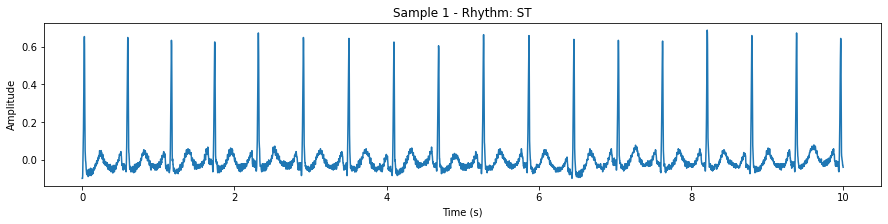

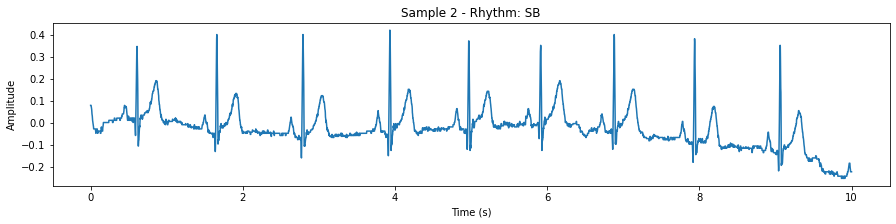

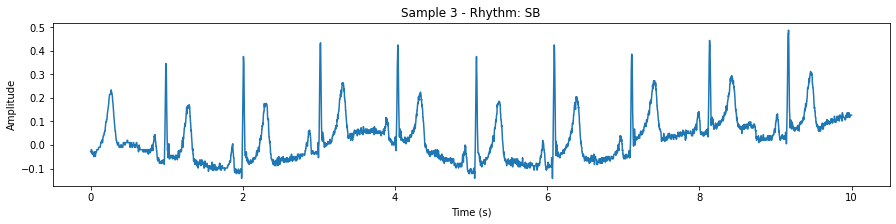

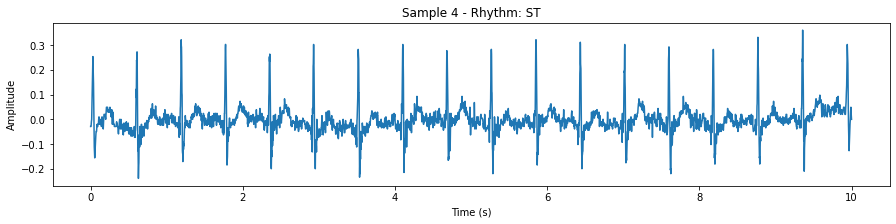

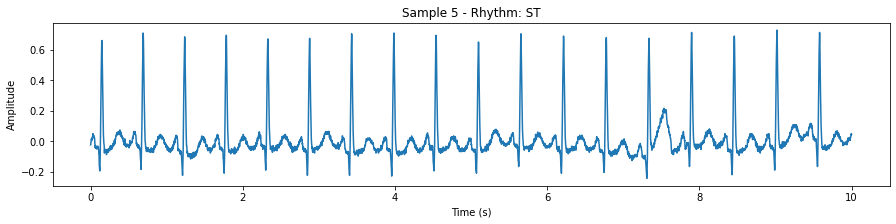

In [5]:
import numpy as np

def plot_ecg_samples(data, labels, fs=500, num_samples=5):
    for i in range(num_samples):
        plt.figure(figsize=(15, 3))
        
        # Create time axis in seconds
        time_axis = np.arange(0, len(data[i])) / fs

        plt.plot(time_axis, data[i])
        plt.title(f"Sample {i + 1} - Rhythm: {labels[i]}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()

# Example usage
plot_ecg_samples(signals, labels, fs=500, num_samples=5)


In [6]:
def print_sample_lengths(data, target_length=5000):
    for i, sample in enumerate(data):
        if len(sample) != target_length:
            print(f"Sample {i}: Length = {len(sample)}")

# Example usage
print_sample_lengths(signals)


In [7]:
def filter_samples(data, labels, target_length=5000):
    filtered_data = []
    filtered_labels = []

    for sample, label in zip(data, labels):
        if len(sample) == target_length:
            filtered_data.append(sample)
            filtered_labels.append(label)

    return filtered_data, filtered_labels

# Example usage
filtered_data, filtered_labels = filter_samples(signals, labels)


In [8]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare the data
X = np.array(filtered_data)
y = np.array(filtered_labels)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create PyTorch datasets
train_dataset = TensorDataset(torch.from_numpy(X_train).unsqueeze(1).float(), torch.from_numpy(y_train).long())
test_dataset = TensorDataset(torch.from_numpy(X_test).unsqueeze(1).float(), torch.from_numpy(y_test).long())

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [9]:
import torch.nn as nn

class ECG_CNN_LSTM(nn.Module):
    def __init__(self, num_classes):
        super(ECG_CNN_LSTM, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=9, padding=4)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=9, padding=4)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(32, 64, kernel_size=9, padding=4)
        self.pool3 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(64, 128, kernel_size=9, padding=4)
        self.pool4 = nn.MaxPool1d(4)
        self.lstm = nn.LSTM(input_size=128, hidden_size=64, num_layers=1, batch_first=True)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        x = self.pool3(self.relu(self.conv3(x)))
        x = self.pool4(self.relu(self.conv4(x)))
        x = x.permute(0, 2, 1)  # (batch_size, seq_len, input_size)
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Get the last output of the LSTM (batch_size, hidden_size)
        x = self.fc(x)
        return x


In [10]:
num_classes= 11

In [11]:
import torch.optim as optim

# Create the model instance
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ECG_CNN_LSTM(num_classes).to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)




           


In [12]:
def train(model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (data, labels) in enumerate(train_loader):
        # Skip iteration if batch size is 1
        if data.size(0) == 1:
            continue

        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    return running_loss / len(train_loader), correct / total


In [13]:
def train(model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    num_batches = 0

    for batch_idx, (data, labels) in enumerate(train_loader):
        # Skip iteration if batch size is 1
        if data.size(0) == 1:
            continue

        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        num_batches += 1

    return running_loss / num_batches, correct / total

In [14]:
# Test function
def test(model, device, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    num_batches = 0

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(test_loader):
            # Skip iteration if batch size is 1
            if data.size(0) == 1:
                continue

            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            num_batches += 1

    return running_loss / num_batches, correct / total



In [15]:
# Number of epochs
num_epochs = 20
log_interval = 1

# Training loop

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train(model, device, train_loader, criterion, optimizer, epoch)
    test_loss, test_acc = test(model, device, test_loader, criterion)

    if epoch % log_interval == 0:
        print(f'Epoch: {epoch}/{num_epochs}')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc * 100:.2f}%')
        print(f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc * 100:.2f}%')


Epoch: 1/20
Train Loss: 0.9566 | Train Acc: 66.96%
Test Loss: 0.5463 | Test Acc: 82.40%
Epoch: 2/20
Train Loss: 0.4630 | Train Acc: 84.91%
Test Loss: 0.4086 | Test Acc: 86.05%
Epoch: 3/20
Train Loss: 0.3676 | Train Acc: 87.67%
Test Loss: 0.3581 | Test Acc: 87.74%
Epoch: 4/20
Train Loss: 0.3330 | Train Acc: 88.77%
Test Loss: 0.3385 | Test Acc: 88.04%
Epoch: 5/20
Train Loss: 0.3087 | Train Acc: 89.59%
Test Loss: 0.3122 | Test Acc: 88.94%
Epoch: 6/20
Train Loss: 0.2918 | Train Acc: 89.99%
Test Loss: 0.2971 | Test Acc: 89.49%
Epoch: 7/20
Train Loss: 0.2789 | Train Acc: 90.37%
Test Loss: 0.3007 | Test Acc: 89.38%
Epoch: 8/20
Train Loss: 0.2698 | Train Acc: 90.56%
Test Loss: 0.3144 | Test Acc: 88.72%
Epoch: 9/20
Train Loss: 0.2608 | Train Acc: 90.84%
Test Loss: 0.2909 | Test Acc: 89.90%
Epoch: 10/20
Train Loss: 0.2506 | Train Acc: 91.12%
Test Loss: 0.2820 | Test Acc: 90.19%
Epoch: 11/20
Train Loss: 0.2421 | Train Acc: 91.37%
Test Loss: 0.2818 | Test Acc: 90.10%
Epoch: 12/20
Train Loss: 0.231

In [16]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def get_predictions(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1).cpu().numpy()
            labels = labels.cpu().numpy()
            
            all_preds.extend(probs)
            all_labels.extend(labels)

    return np.array(all_labels), np.array(all_preds)

y_true, y_pred = get_predictions(model, test_loader, device)


/Users/aman/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/Users/aman/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


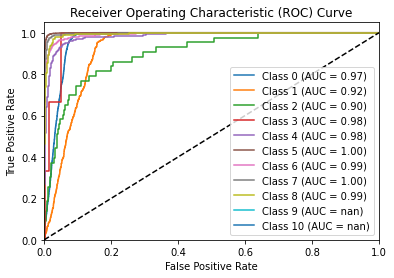

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve(y_true, y_pred, n_classes):
    y_true_binarized = label_binarize(y_true, classes=np.arange(n_classes))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_true, y_pred, num_classes)


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve(y_true, y_pred, class_names):
    n_classes = len(class_names)
    y_true_binarized = label_binarize(y_true, classes=np.arange(n_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10,10))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [48]:
snomed_to_name = {
    5: 'Sinus Bradycardia',
    6: 'Sinus Rhythm',
    1: 'Atrial Fibrillation',
    7: 'Sinus Tachycardia',
    0: 'Atrial Flutter',
    9: 'Sinus Irregularity',
    8: 'Supraventricular Tachycardia',
    2: 'Atrial Tachycardia',
    3: 'Atrioventricular Node Reentrant Tachycardia',
    4: 'Atrioventricular Reentrant Tachycardia',
    10: 'Sinus Atrium to Atrial Wandering Rhythm'
}


In [49]:
unique_labels = np.unique(y_true)


In [50]:
class_names = [snomed_to_name[label] for label in unique_labels]


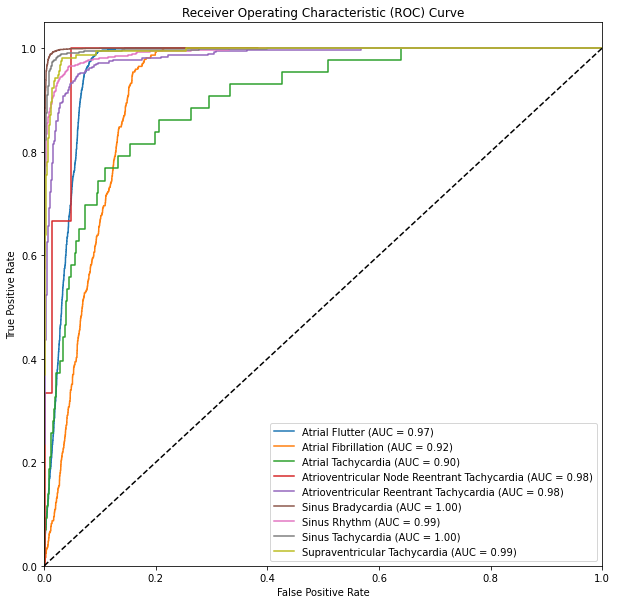

In [54]:
plot_roc_curve(y_true, y_pred, class_names)


In [35]:
print("Unique labels:", unique_labels)


Unique labels: [0 1 2 3 4 5 6 7 8]


In [39]:
unique_snomed_codes = label_encoder.inverse_transform(unique_labels)


In [40]:
print(unique_snomed_codes)

['AF' 'AFIB' 'AT' 'AVRT' 'SA' 'SB' 'SR' 'ST' 'SVT']


In [52]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, class_names, title='ROC Curve', figsize=(10, 10)):
    plt.figure(figsize=figsize)
    for i in range(len(fpr)):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} (AUC = {auc(fpr[i], tpr[i]):.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(fpr, tpr, class_names, figsize=(10, 10))


NameError: name 'fpr' is not defined